## Routine for importing EBAS files and plotting $O_3$ data



Packages needed:

In [2]:
import os, glob, sys
import numpy as np
import datetime as dt
import pandas as pd
from scipy import fftpack
from scipy import stats
import zipfile
import matplotlib.pyplot as plt
import matplotlib.path as mpath

Import zipfiles:

In [3]:
def unzip(file, folder):
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('{}/'.format(folder))


In [10]:
#os.chdir('ODEfiles/')

# Alert 2000-2003: 

ALT00_03 = 'EBAS_Alert_2000-2003.zip'
unzip(ALT00_03, 'ALT00_03')

# Eureka 2018:

EUK18 = 'EBAS_Eureka_2018.zip'
unzip(EUK18, 'EUK18')

# Station Nord 2008-2015:

DK0010G08_15 = 'EBAS_StationNord_2008-2015.zip'
unzip(DK0010G08_15, 'DK0010G08_15')

# Summit 2004-2007:

SUM04_07 = 'EBAS_Summit_2004-2007.zip'
unzip(SUM04_07, 'SUM04_07')

# Tiksi 2013-2015:

TIK13_15 = 'EBAS_Tiksi_2013-2015.zip'
unzip(TIK13_15, 'TIK13_15')

# Zeppelin 1999-2002:
 
ZEP99_02 = 'EBAS_Zeppelin_1999-2002.zip'
unzip(ZEP99_02, 'ZEP99_02')

# Zeppelin 2005-2007:

ZEP05_07 = 'EBAS_Zeppelin_2005-2007.zip'
unzip(ZEP05_07, 'ZEP05_07')

# Change directory back to home directory
os.chdir('..')
# check that it's the correct directory
cwd = os.getcwd()
print(cwd)

/Users/maritkollstuen/Weather_station_data


Read data:

In [11]:
# flags: 0.999

# from pyaerocom.io import EbasNasaAmesFile

path = 'ODEfiles/'
stations = [ALT00_03, EUK18, DK0010G08_15, SUM04_07, TIK13_15, ZEP99_02, ZEP05_07]
header_starts = [52, 78, 44, 74, 76, 51, 51]


file = 'ALT00_03/CA0420G.20000101090000.20140501000000.uv_abs.ozone.air.1y.1h.CA01L_O3mon_420.CA01L_UV_absorption..nas'

alt1 = pd.read_table(path + file, sep='\s+', header = 52)
alt1.head()

,starttime,endtime,O3,flag_O3
0,0.375000,0.416667,63.56,0.0
1,0.416667,0.458333,63.34,0.0
2,0.458333,0.500000,64.38,0.0
3,0.500000,0.541667,64.02,0.0
4,0.541667,0.583333,64.76,0.0


### Barrow: plain text files

In [12]:
# Plain text, space separated, headerless files:

BRW05 = pd.read_table(path + 'BRW_Ozone_Hourly_2005', sep='\s+', header = None)
BRW05.columns = ['something', 'Year', 'Month', 'Day', 'Hour', 'O3']
BRW06 = pd.read_table(path + 'BRW_Ozone_Hourly_2006', sep='\s+', header = None)
BRW06.columns = ['something', 'Year', 'Month', 'Day', 'Hour', 'O3']
BRW07 = pd.read_table(path + 'BRW_Ozone_Hourly_2007', sep='\s+', header = None)
BRW07.columns = ['something', 'Year', 'Month', 'Day', 'Hour', 'O3']
BRW05.head()

,something,Year,Month,Day,Hour,O3
0,199,2005,1,1,1,34.8
1,199,2005,1,1,2,34.7
2,199,2005,1,1,3,33.3
3,199,2005,1,1,4,34.1
4,199,2005,1,1,5,34.3


Plot data: 

### Create map of stations:

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas

Create dataframe with the different stations and locations:

In [4]:
Station_locations = (['Alert', 82.4991455078, -62.3415260315], \
                     ['Barrow', 71.325000, -156.625000], \
                     ['Zeppelin', 78.90715, 11.88668], \
                     ['Station Nord', 81.600000, -16.666667], \
                     ['Summit', 72.5800018311, -38.4799995422], \
                     ['Tiksi', 71.5861663818, 128.918823242], \
                     ['Eureka', 80.0500030518, -86.4166564941])
df = pd.DataFrame(Station_locations, columns = ['Station', 'lat', 'lon'])

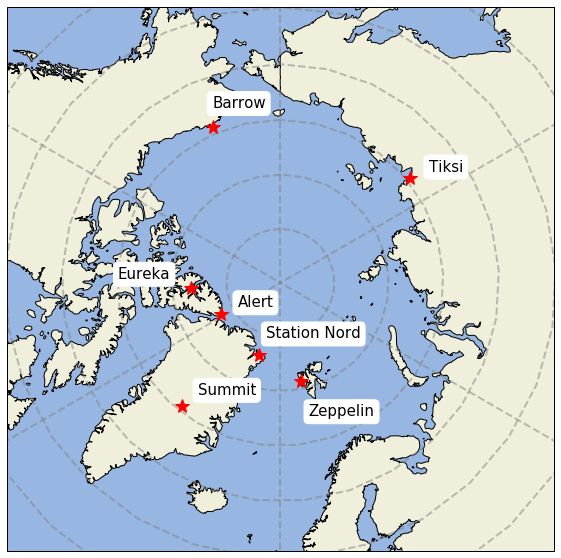

In [35]:
extent = [-180, 180, 90, 60]
resolution = '50m'

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection = ccrs.NorthPolarStereo(central_longitude = 0))


# Fill in ocean color
ax.imshow(np.tile(np.array([[cfeature.COLORS['water'] * 255]], \
                        dtype=np.uint8), [2, 2, 1]), origin='upper', \
                        transform=ccrs.PlateCarree(), \
                        extent=[-180, 180, -180, 180])

# Fill in land color
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', \
                        resolution, edgecolor='black', \
                        facecolor=cfeature.COLORS['land']))

# Set extent of map and add gridlines
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), #draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


# Plot stations and station names
for index, row in df.iterrows():
    ax.plot(row['lon'], row['lat'], 'r*', transform=ccrs.PlateCarree(), \
                        markersize = 15)
    if index == 4: #Summit
        ax.text(row['lon']+2, row['lat']+2, str(row['Station']), size = 15, \
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 1: #Barrow
        ax.text(row['lon']-2, row['lat']-2, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 3: #Station Nord
        ax.text(row['lon']+2, row['lat']+2, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 5: #Tiksi
        ax.text(row['lon']-2, row['lat']-2, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 2: #Zeppelin
        ax.text(row['lon'], row['lat']-4, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 0: #Alert
        ax.text(row['lon']+2, row['lat']+2, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())
    elif index == 6: #Eurekaw
        ax.text(row['lon']-5, row['lat']-8, str(row['Station']), size = 15,\
            bbox=dict(facecolor='white', fill='True', edgecolor='white', boxstyle='round'), \
            transform=ccrs.PlateCarree())

plt.savefig('figs/StationMap.pdf')
plt.show()